In [1]:
from matplotlib import pyplot as plt
import numpy as np

from modules import calib

In [2]:
DIR = "surface/"

In [3]:
x = calib.px2mm(np.linspace(693, -46, 32))
x = x[:-2]

ave_dx = []
std_dx = []

for i in range(11):
    idx = 10 + 5 * i
    ave_dx.append(calib.f2s(calib.px2mm(np.loadtxt(DIR + f"ave_{idx}_dx.csv", delimiter=',')[:-2])))
    std_dx.append(calib.f2s(calib.px2mm(np.loadtxt(DIR + f"ave_{idx}_dx.csv", delimiter=',')[:-2])))

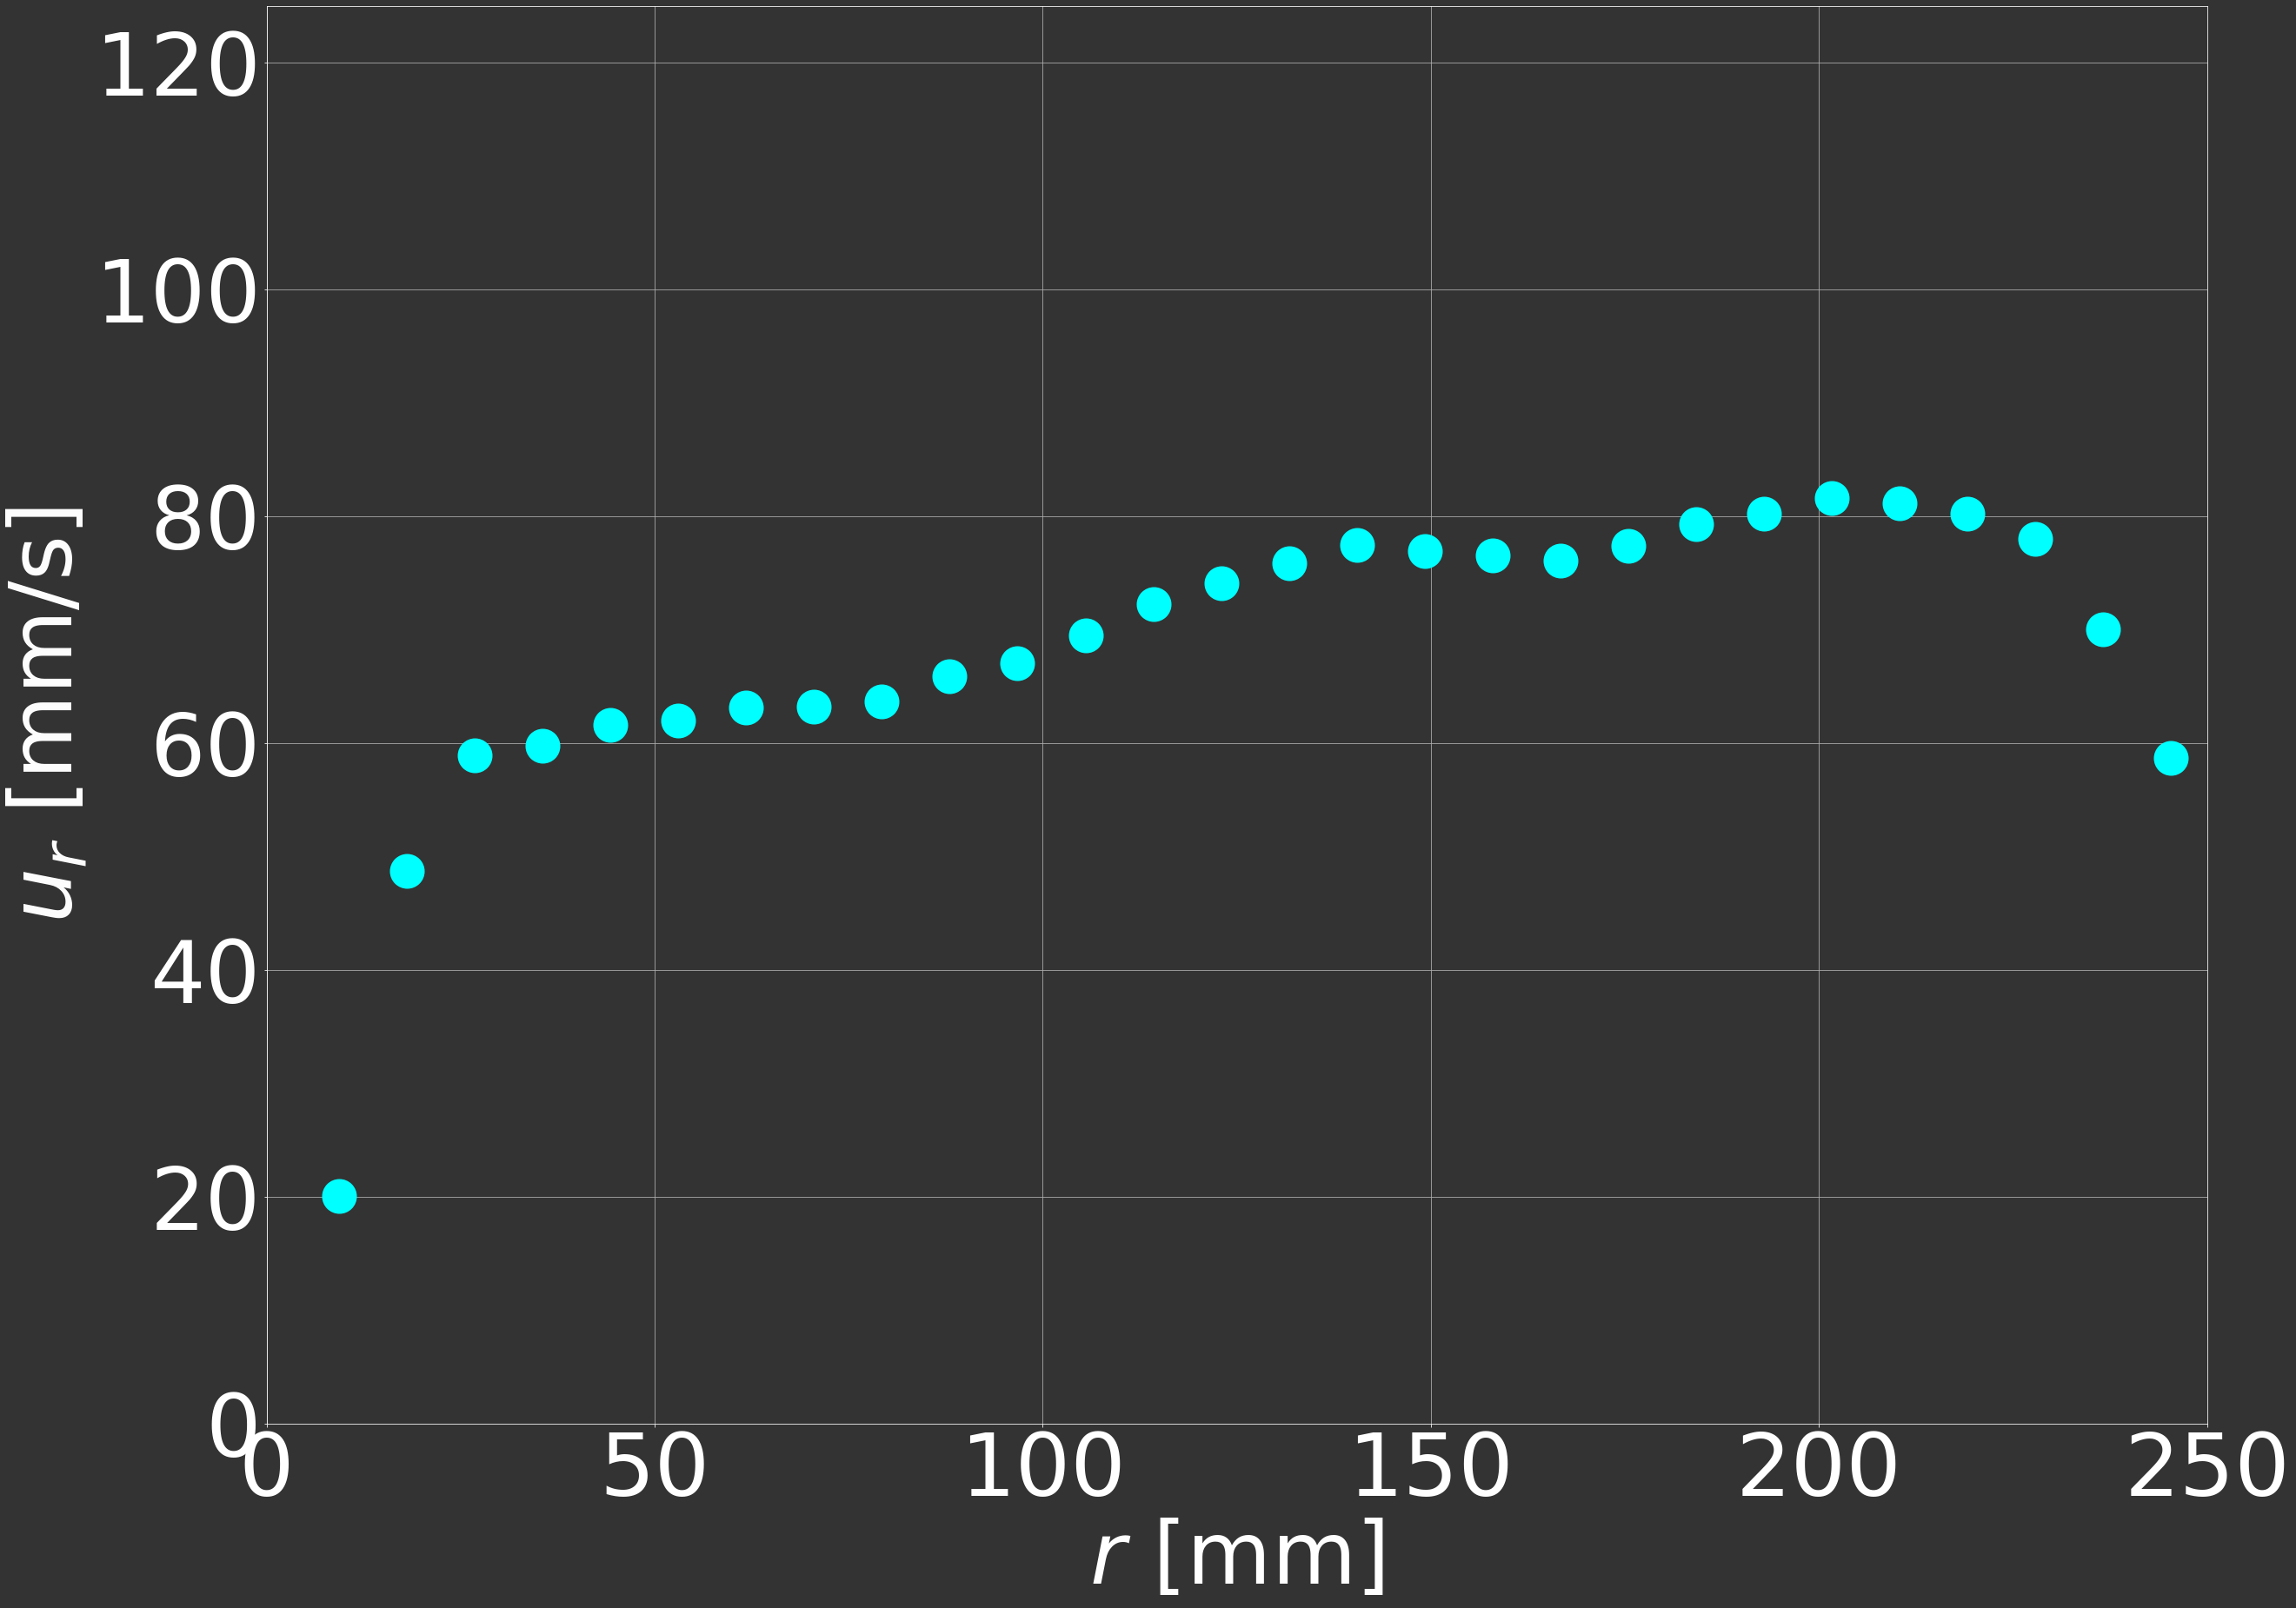

In [13]:
fig, ax = plt.subplots(facecolor="#333333", figsize=(40, 30))

ax.set_facecolor('#333333')
ax.spines['top'].set_color('#ffffff')
ax.spines['bottom'].set_color('#ffffff')
ax.spines['left'].set_color('#ffffff')
ax.spines['right'].set_color('#ffffff')
ax.tick_params(axis='x', colors='#ffffff')
ax.tick_params(axis='y', colors='#ffffff')
ax.xaxis.label.set_color('#ffffff')
ax.yaxis.label.set_color('#ffffff')

c = plt.get_cmap('jet')
m = ["s", "v", "o", "D", "^", "x"]
plt.xlim(0, 250)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel(r"$u_{r}$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(11):
    if i == 4:
        ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i/2)], color='cyan', label=f"{1 + 0.5 * i} L/min", markersize=30, markeredgewidth=10)
ax.grid()
plt.savefig("imgs/surface_alone.png", dpi=80)
# plt.show()

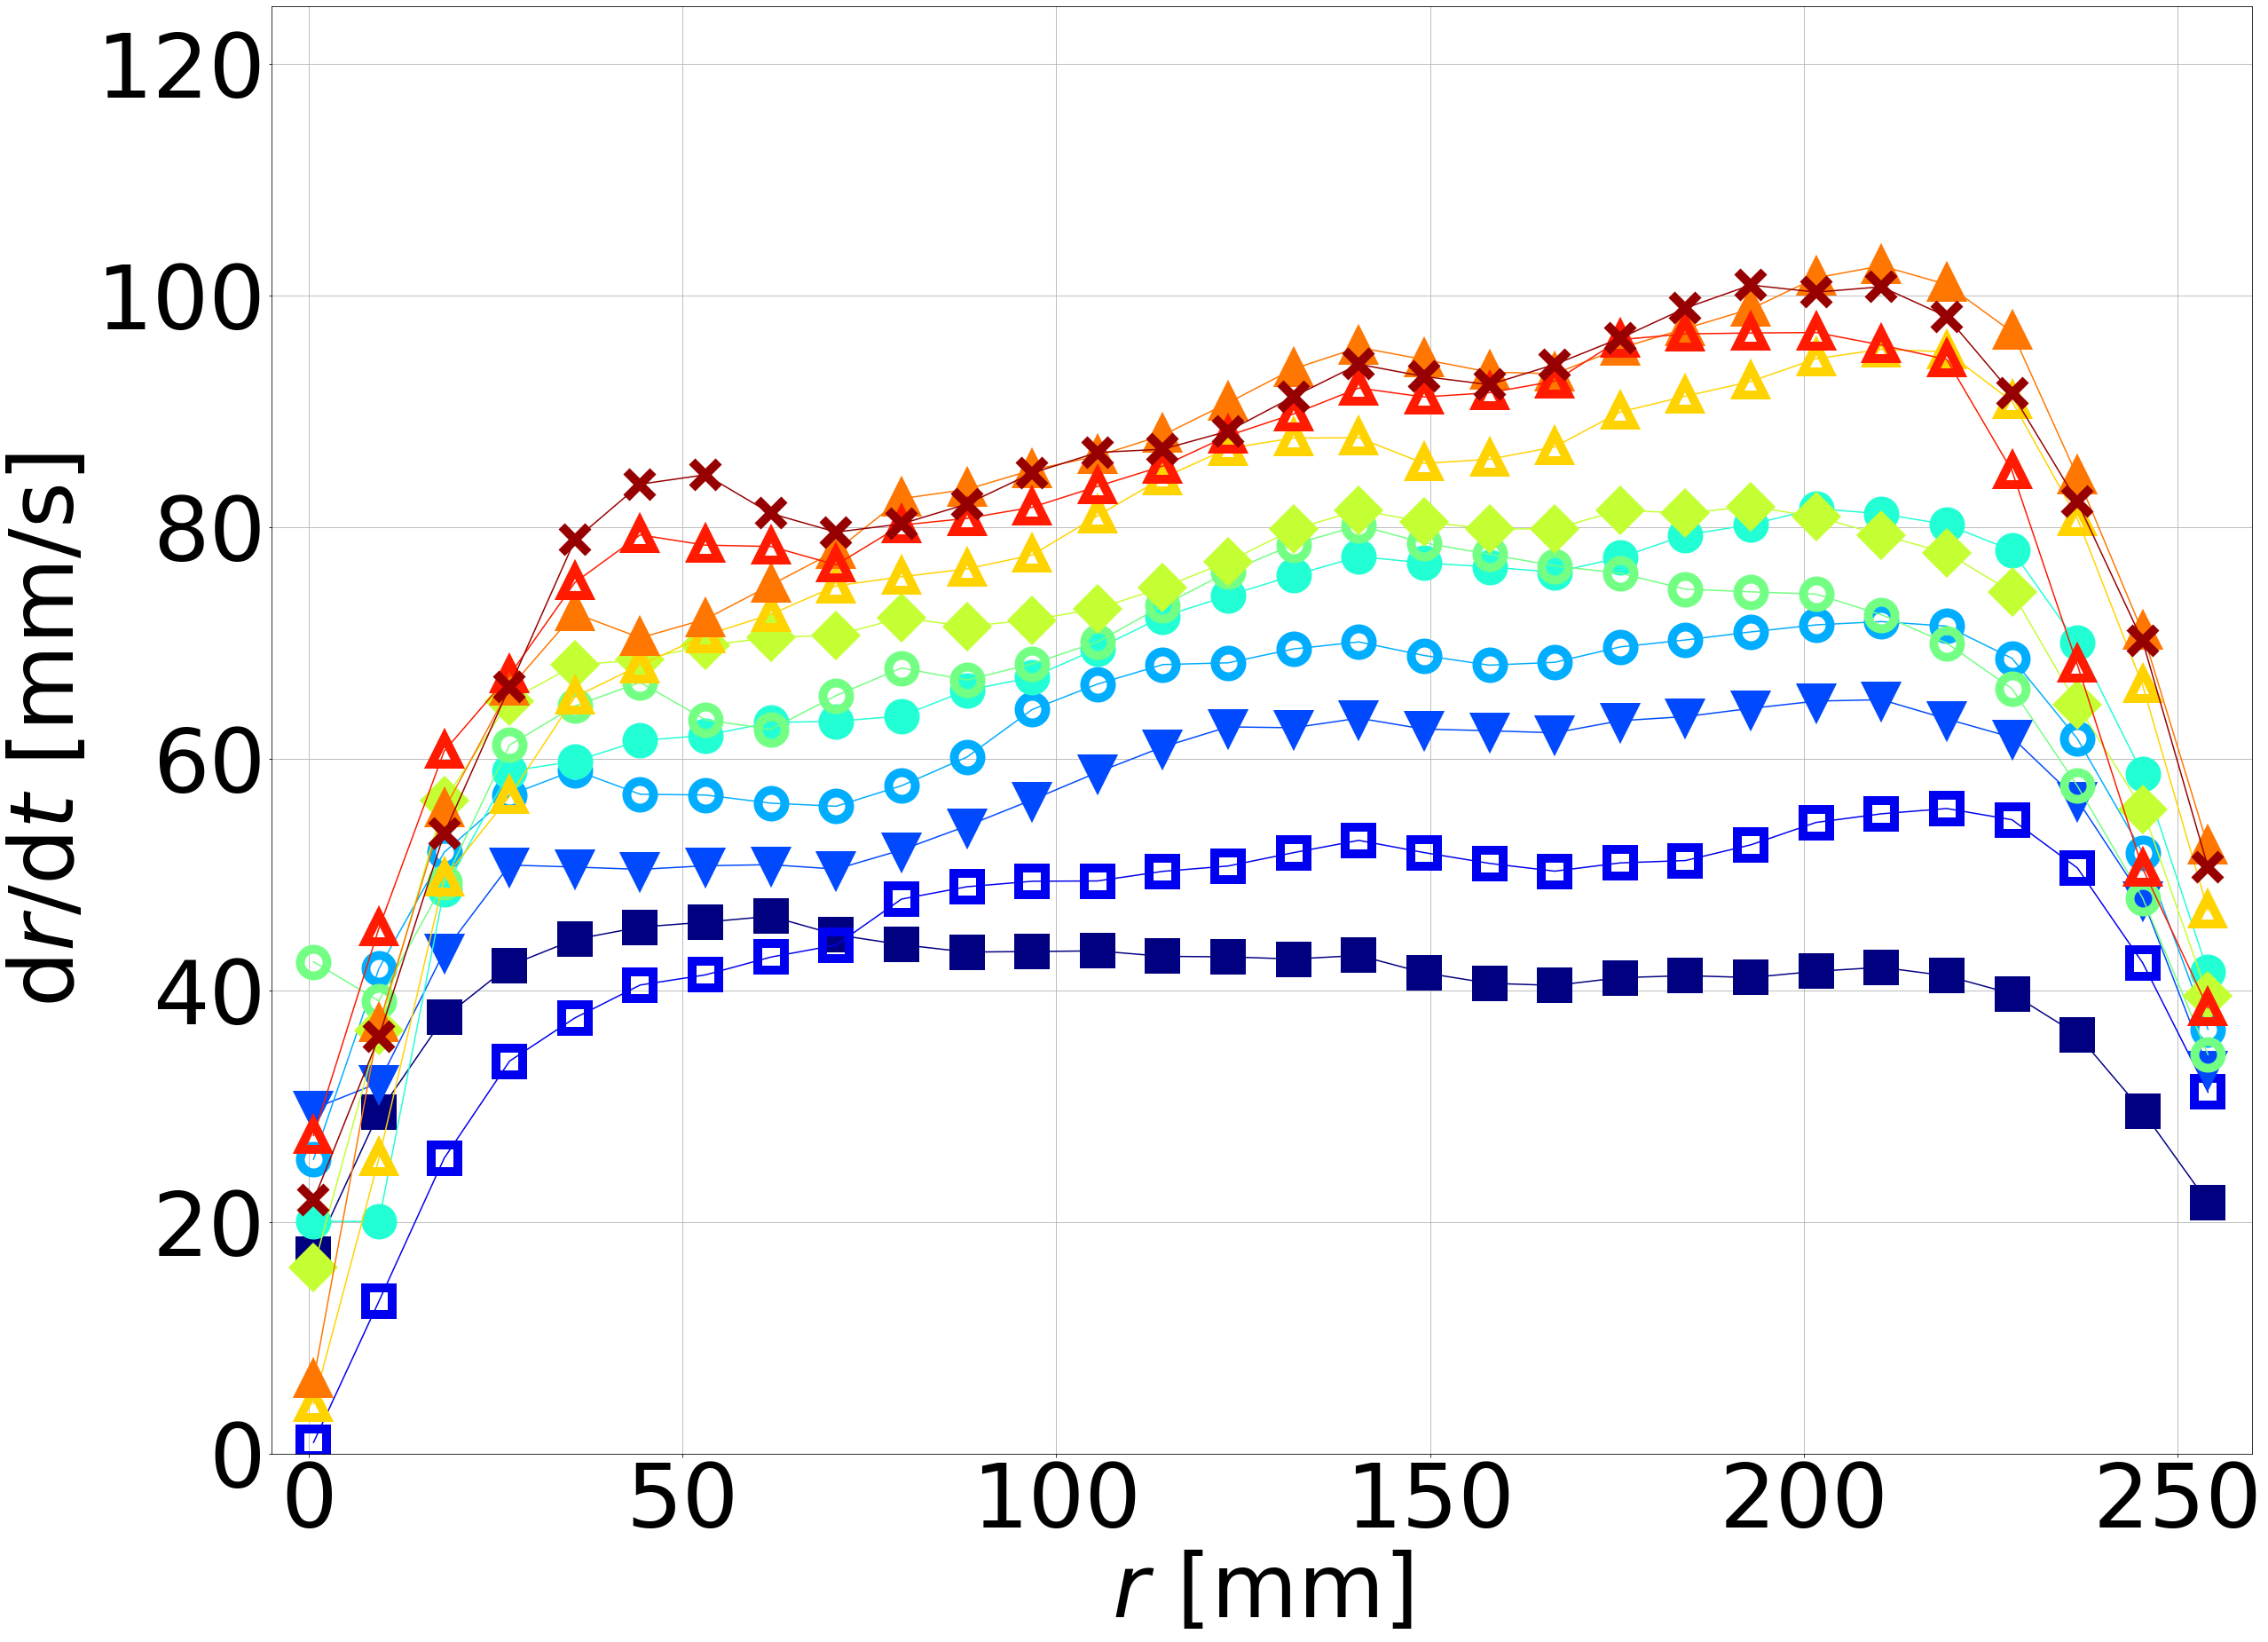

In [18]:
fig, ax = plt.subplots(figsize=(40, 30))
c = plt.get_cmap('jet')
m = ["s", "v", "o", "D", "^", "x"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(11):
    ax.plot(x, -ave_dx[i], color=c(i*25), lw=1.5)
    if i % 2 == 0:
        ax.plot(x, -ave_dx[i], m[round(i/2)], color=c(i*25), label=f"{1 + 0.5 * i} L/min", markersize=30, markeredgewidth=10)
    else:
        ax.plot(x, -ave_dx[i], m[round(i/2)], color='none', markeredgecolor=c(i*25), label=f"{1 + 0.5 * i} L/min", markersize=30, markeredgewidth=10)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=100)
ax.grid()
# plt.savefig("surface_n.png", dpi=80)
plt.show()